# 1 引言

逻辑不逻辑，回归非回归。

回想当年初次学习逻辑回归算法时，看到”逻辑回归“这个名字，第一感觉是这是一个与线性回归类似的回归类别的算法，只不过这个算法突出”逻辑“，或者与某个以”逻辑“命名的知识点有关。可后来却发现，这是一个坑死人不偿命的名字——逻辑回归算法不是回归算法，是分类算法，也与逻辑无关，要说有关也仅是因为它的英文名字是Loginstics，音译为逻辑而已（所以也有资料称之为逻辑斯蒂回归)。

# 2 逻辑回归原理
## 2.1 从线性回归到逻辑回归

在上一篇博文中，我们详细说过回归算法与分类算法的区别。逻辑回归既然是分类算法，为什么不叫逻辑分类而是逻辑回归呢？在我看来，这是因为逻辑回归用回归的思路去解决分类的问题。

假设有如下图所示的一个数据集，使用线性回归算法，我们可以找到大致如黑线的一个线性模型对其进行拟合。对于回归算法，需要做的是对数据集中每一个xi
，都能通过模型找到一个yi（预测值）与之对应。

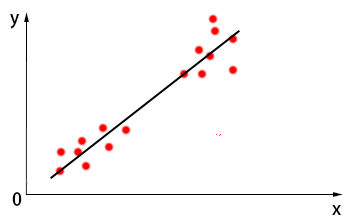

获得了预测值${{y}_{i}}$，我们就可以做很多事情了，例如：分类。我们可以对${{y}_{i}}$进行分段，例如，在${{y}}$轴上取一值$M$，当${{y}_{i}}<M$时，我们将其标记到类0中，当${{y}_{i}}>M$时，我们将其标记到另一类1中，如下图所示：

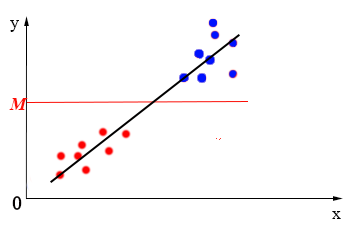

这就实现了以回归的思路来实现分类。

但逻辑回归可不止在线性回归的基础上做这些事情。在上一篇介绍线性回归的博文的末尾，我们提到，线性回归有一个很致命的缺陷——对异常值很敏感，如果数据集中出现异常值，拟合出来的线性模型也将出现很大变化，预测出来的结果也将不在那么准确，从而到导致分类错误。如下图所示，数据集中出现一个异常点（绿点），那么拟合出来的模型就可能从原来的黑线变为绿线，此时，当数据集中有某一点$x\in ({{x}_{1}},{{x}_{2}})$时，该点就回被误判，例如图中橙色点，在原本黑线模型中，该点预测出来的${{y}}$值大于$M$，被标记到1类中，但在绿线模型中，其${{y}}$值就小于$M$，就回被误标记到0类中。

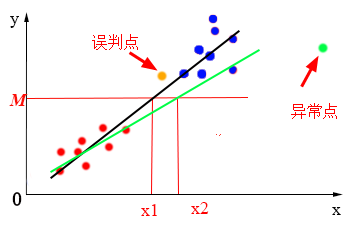

逻辑回归算法对线性回归对异常数据敏感的不足进行了优化改进。怎么改进呢？最直观的方法就是将直线“掰弯”。“掰弯”之后，就算出现异常数据，模型主体部分也不会出现太多改变，从而解决线性回归模型对异常值敏感的问题，如下图所示：

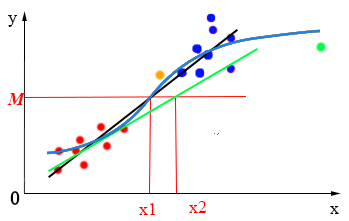

而我们所用的“掰弯”方法就是用sigmod函数与线性函数进行复合。

## 2.2 sigmod函数

sigmoid函数也叫Logistic函数，函数表达式如下：

$$g(z)=\frac{1}{1+{{e}^{-x}}}$$

其中，$e$为自然对数，是一个常数，值约为2.71828。

函数图像如下：

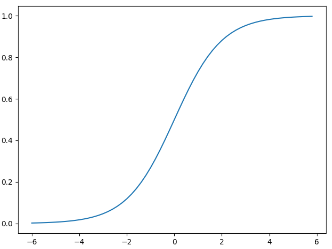

从函数图像可以看出， sigmoid函数可以很好地将$(-\infty ,+\infty )$内的数映射到$(0,1)$ 上，于是我们可以将$g(z)\ge 0.5$时我们可以将该条数据标记为1类， $g(z)<0.5$时标记为0类。即：  

$$y=\left\{ _{0,\text{    }g(z)<0.5}^{1,\text{    }g(z)\ge 0.5} \right.$$

其中$y$表示分类结果。  

通常，在逻辑回归算法应用中，模型可不会如同上面的sigmoid函数那么简单，而是sigmoid函数与线性函数的组合：  

$$g(z)=\frac{1}{1+{{e}^{-z}}}$$

其中，$z$就是线性回归中的预测值，即：  

$$z=f(x)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+\cdots +{{\theta }_{n}}{{x}_{n}}$$
所以有：

$$h(x)=\frac{1}{1+{{e}^{-({{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+\cdots +{{\theta }_{n}}{{x}_{n}})}}}$$
用矩阵方式表示：
$$h(x)=g(z)=g({{\theta }^{T}}x)=\frac{1}{1+{{e}^{-{{\theta }^{T}}x}}}$$

其中，$\theta =\left[ \begin{matrix}
   {{\theta }_{0}}  \\
   {{\theta }_{1}}  \\
   \vdots   \\
   {{\theta }_{n}}  \\
\end{matrix} \right]$,  $x=\left[ \begin{matrix}
   {{x}_{0}}  \\
   {{x}_{1}}  \\
   \vdots   \\
   {{x}_{n}}  \\
\end{matrix} \right]$

# 3 损失函数
下一步我们要做的就是如何求取最佳拟合模型的问题了。在线性回归算法中，我们使用误差平方和或者均方误差来作为损失函数，但是在逻辑回归中，这个方法不再使用，因为已被证明，在逻辑回归模型中使用误差平方和作为损失函数的话，会存在在许多局部最小值点，在求解参数的过程中很容易陷入局部最小值点，而无法求得真正的最小值点。

上面说过，$h(x)\in (0,1)$，这一点的性质刚好与概率$p\in [0,1]$的性质吻合（当做概率使用的理由不止这点），故而我们可以将其当做$h(x)$值当做数据被标记为1类的概率，即：

$$p(y=1|x;\theta )=h(x)$$
$$p(y=0|x;\theta )=1-h(x)$$

当给定$y$为1时，即属于1类时，$h(x)$越趋近于1，被预测为1类的概率就越大，损失（误差）就越小；反之，当给定% $y$为0时，即属于0类时，$h(x)$越趋近于1，被预测为0类的概率就越小，损失（误差）就越大，于是，我们可以定义损失函数：

$$\cos t(h(x),y)=\left\{ _{-\log (1-h(x)),\text{    }y=0}^{-\log (h(x)),\text{        }y=1} \right.$$

对所有数据集中$x$损失累加然后求平均，有：

$$J(\theta )=-\frac{1}{m}\sum\limits_{i=1}^{m}{\cos (h(x),y)}$$

由于$y$的取值为0或1，结合上面两个公式可以得到：

$$J(\theta )=-\frac{1}{m}\sum\limits_{i=1}^{m}{({{y}_{i}}\log (h({{x}_{i}}))+(1-{{y}_{i}})\log (1-h({{x}_{i}})))}$$

这个函数就是我们逻辑回归的损失函数,我们把它称为交叉熵损失函数。

接下来就是针对的优化问题，也就是求得最小值，在[这位大佬的博客](https://blog.csdn.net/ligang_csdn/article/details/53838743)里推导过程写得很详细，我自愧不如，就不献丑了。

# 4 代码实现

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 制造数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

In [3]:
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # LongTensor = 64-bit integer

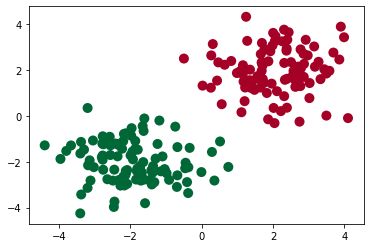

In [4]:
# 画图
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [5]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.lr = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
 
    def forward(self, x):
        x = self.lr(x)
        x = self.sm(x)
        return x

In [6]:
logistic_model = LogisticRegression()
if torch.cuda.is_available():
    logistic_model.cuda()
 
# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3, momentum=0.9)

In [7]:
# 开始训练
for epoch in range(10000):
    if torch.cuda.is_available():
        x_data = Variable(x).cuda()
        y_data = Variable(y).cuda()
    else:
        x_data = Variable(x)
        y_data = Variable(y)
 
    out = logistic_model(x_data)
    loss = criterion(out, y_data)
    print_loss = loss.data.item()
    mask = out.ge(0.5).float()  # 以0.5为阈值进行分类
    correct = (mask == y_data).sum()  # 计算正确预测的样本个数
    acc = correct.item() / x_data.size(0)  # 计算精度
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 每隔20轮打印一下当前的误差和精度
    if (epoch + 1) % 20 == 0:
        print('*'*10)
        print('epoch {}'.format(epoch+1)) # 训练轮数
        print('loss is {:.4f}'.format(print_loss))  # 误差
        print('acc is {:.4f}'.format(acc))  # 精度

/home/chb/anaconda3/envs/study_python/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


**********
epoch 20
loss is 1.3634
acc is 100.0000
**********
epoch 40
loss is 0.7231
acc is 100.0000
**********
epoch 60
loss is 0.4159
acc is 100.0000
**********
epoch 80
loss is 0.2842
acc is 100.0000
**********
epoch 100
loss is 0.2185
acc is 100.0000
**********
epoch 120
loss is 0.1796
acc is 100.0000
**********
epoch 140
loss is 0.1537
acc is 100.0000
**********
epoch 160
loss is 0.1352
acc is 100.0000
**********
epoch 180
loss is 0.1211
acc is 100.0000
**********
epoch 200
loss is 0.1100
acc is 100.0000
**********
epoch 220
loss is 0.1010
acc is 100.0000
**********
epoch 240
loss is 0.0936
acc is 100.0000
**********
epoch 260
loss is 0.0873
acc is 100.0000
**********
epoch 280
loss is 0.0820
acc is 100.0000
**********
epoch 300
loss is 0.0773
acc is 100.0000
**********
epoch 320
loss is 0.0733
acc is 100.0000
**********
epoch 340
loss is 0.0697
acc is 100.0000
**********
epoch 360
loss is 0.0665
acc is 100.0000
**********
epoch 380
loss is 0.0636
acc is 100.0000
**********
epoch

**********
epoch 3740
loss is 0.0116
acc is 100.0000
**********
epoch 3760
loss is 0.0115
acc is 100.0000
**********
epoch 3780
loss is 0.0115
acc is 100.0000
**********
epoch 3800
loss is 0.0115
acc is 100.0000
**********
epoch 3820
loss is 0.0114
acc is 100.0000
**********
epoch 3840
loss is 0.0114
acc is 100.0000
**********
epoch 3860
loss is 0.0113
acc is 100.0000
**********
epoch 3880
loss is 0.0113
acc is 100.0000
**********
epoch 3900
loss is 0.0113
acc is 100.0000
**********
epoch 3920
loss is 0.0112
acc is 100.0000
**********
epoch 3940
loss is 0.0112
acc is 100.0000
**********
epoch 3960
loss is 0.0111
acc is 100.0000
**********
epoch 3980
loss is 0.0111
acc is 100.0000
**********
epoch 4000
loss is 0.0111
acc is 100.0000
**********
epoch 4020
loss is 0.0110
acc is 100.0000
**********
epoch 4040
loss is 0.0110
acc is 100.0000
**********
epoch 4060
loss is 0.0109
acc is 100.0000
**********
epoch 4080
loss is 0.0109
acc is 100.0000
**********
epoch 4100
loss is 0.0109
acc is 10

**********
epoch 7480
loss is 0.0072
acc is 100.0000
**********
epoch 7500
loss is 0.0072
acc is 100.0000
**********
epoch 7520
loss is 0.0071
acc is 100.0000
**********
epoch 7540
loss is 0.0071
acc is 100.0000
**********
epoch 7560
loss is 0.0071
acc is 100.0000
**********
epoch 7580
loss is 0.0071
acc is 100.0000
**********
epoch 7600
loss is 0.0071
acc is 100.0000
**********
epoch 7620
loss is 0.0071
acc is 100.0000
**********
epoch 7640
loss is 0.0071
acc is 100.0000
**********
epoch 7660
loss is 0.0071
acc is 100.0000
**********
epoch 7680
loss is 0.0070
acc is 100.0000
**********
epoch 7700
loss is 0.0070
acc is 100.0000
**********
epoch 7720
loss is 0.0070
acc is 100.0000
**********
epoch 7740
loss is 0.0070
acc is 100.0000
**********
epoch 7760
loss is 0.0070
acc is 100.0000
**********
epoch 7780
loss is 0.0070
acc is 100.0000
**********
epoch 7800
loss is 0.0070
acc is 100.0000
**********
epoch 7820
loss is 0.0070
acc is 100.0000
**********
epoch 7840
loss is 0.0069
acc is 10

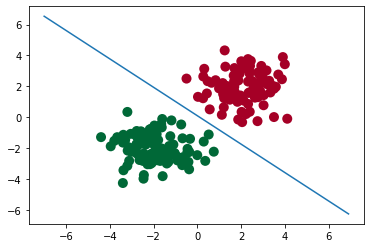

In [8]:
# 结果可视化
w0, w1 = logistic_model.lr.weight[0]
w0 = float(w0.item())
w1 = float(w1.item())
b = float(logistic_model.lr.bias.item())
plot_x = np.arange(-7, 7, 0.1)
plot_y = (-w0 * plot_x - b) / w1
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.plot(plot_x, plot_y)
plt.show()

# 4 总结
总结一下逻辑回归的优缺点。

优点：

1）预测结果是介于0和1之间的概率；

2）可以适用于连续性和类别性自变量；

3）容易使用和解释。

缺点：

1）对模型中自变量多重共线性较为敏感，例如两个高度相关自变量同时放入模型，可能导致较弱的一个自变量回归符号不符合预期，符号被扭转。需要利用因子分析或者变量聚类分析等手段来选择代表性的自变量，以减少候选变量之间的相关性；

2）预测结果呈“S”型，因此从log(odds)向概率转化的过程是非线性的，在两端随着log(odds)值的变化，概率变化很小，边际值太小，slope太小，而中间概率的变化很大，很敏感。 导致很多区间的变量变化对目标概率的影响没有区分度，无法确定阀值。

**参考**：

https://blog.csdn.net/out_of_memory_error/article/details/81275651

https://www.cnblogs.com/yiduobaozhiblog1/p/8872903.html

https://blog.csdn.net/ligang_csdn/article/details/53838743

https://baijiahao.baidu.com/s?id=1620514366177013756&wfr=spider&for=pc
